<a href="https://colab.research.google.com/github/sujitojha1/EVA8/blob/main/Session12/EVA8_Session12_YoloV3_CustomData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YOLOv3 Object Detection with Custom Dataset

Custom Dataset with Animation character: Joy, Hiccup, Moana and Ralph

## Loading the libraries, modules and dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd /content

/content


In [3]:
# Load modules/models from EVA course
!rm -rf YoloV3
!git clone https://github.com/sujitojha1/YoloV3.git -q

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Loading YoloV3 Weights
!cp -r /content/gdrive/MyDrive/EVA8/Session12/weights /content/YoloV3/

# Clearing existing custom data
!rm -rf /content/YoloV3/data/customdata

# Copying custom data from gdrive
!cp -r /content/gdrive/MyDrive/EVA8/Session12/customdata /content/YoloV3/data/

In [6]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [7]:
ls

gdrive/  sample_data/  YoloV3/


In [8]:
cd YoloV3/

/content/YoloV3


In [9]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


In [10]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(epochs=3, batch_size=3, accumulate=4, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-24 05:19:01.234647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 05:19:02.207679: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; 

In [11]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom1.cfg --epochs 200

Namespace(epochs=200, batch_size=10, accumulate=4, cfg='cfg/yolov3-custom1.cfg', data='data/customdata/custom.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=False, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-24 05:19:41.797827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 05:19:42.759334: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or dir

In [12]:
!python detect.py --cfg cfg/yolov3-custom1.cfg --conf-thres 0.3 --output out_out

Namespace(cfg='cfg/yolov3-custom1.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/customdata/images', output='out_out', img_size=512, conf_thres=0.3, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/153 data/customdata/images/09e8400202f785f36a1609396a21cfe5.jpeg: 512x512 1 hiccups, Done. (0.043s)
image 2/153 data/customdata/images/1080-Wreck-it-Ralph-Screencap-wreck-it-ralph-33784540-1920-808Medium.jpe

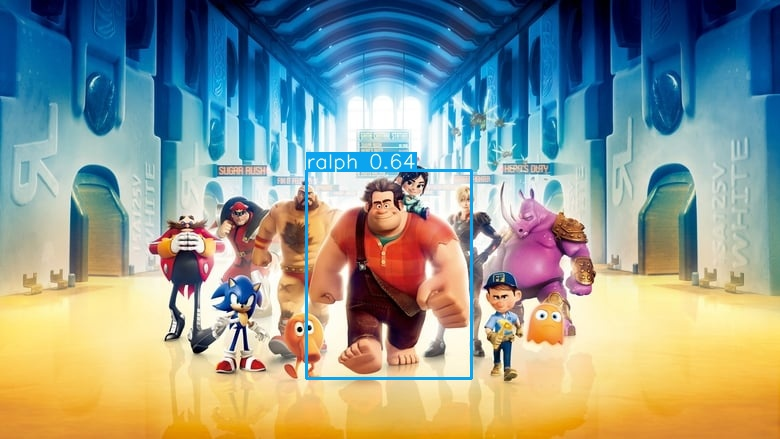

In [43]:
Image(filename='out_out/ziC23LkMYj8gToQQYQGWSGJCLNF.jpeg', width=500)

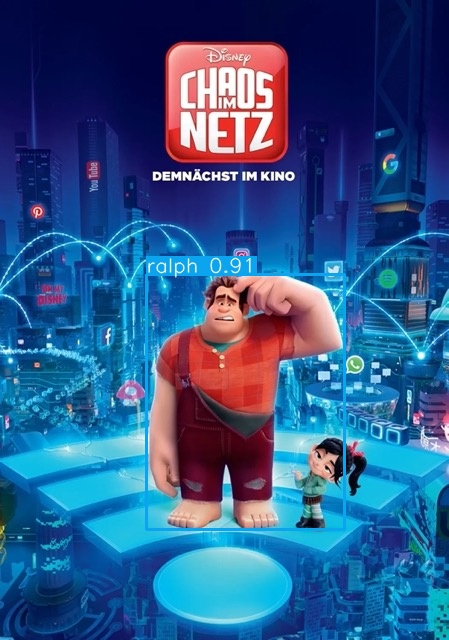

In [22]:
Image(filename='out_out/Ralph-Breaks-The-Internet-4Medium.jpeg', width=400)

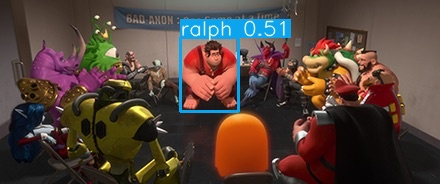

In [29]:
Image(filename='out_out/Bowserwreckitralph.jpeg', width=400)

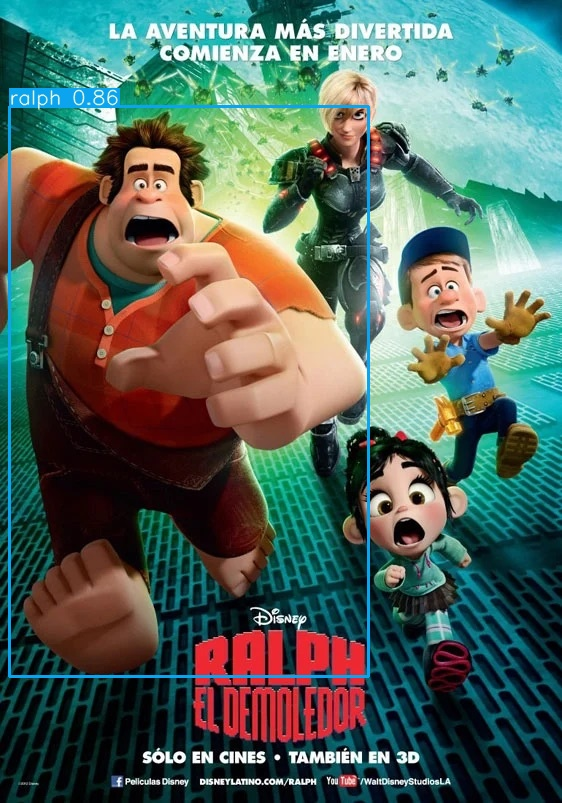

In [30]:
Image(filename='out_out/wreck_it_ralph-16.jpeg', width=400)

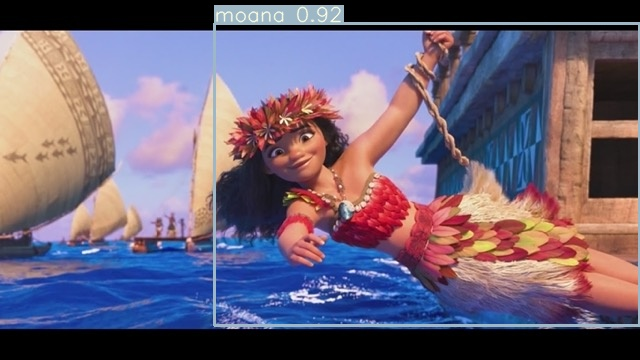

In [36]:
Image(filename='out_out/moana_06Medium.jpeg', width=500)

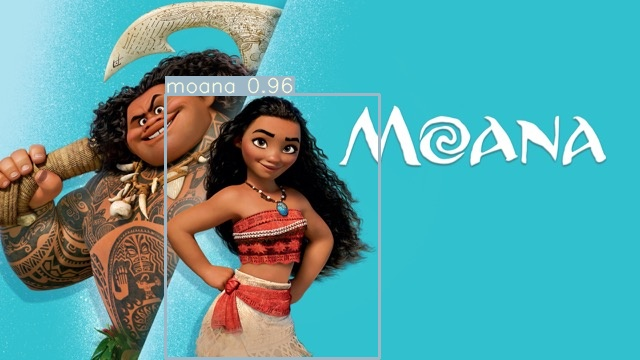

In [35]:
Image(filename='out_out/mtYxEUvcjrwzfzpJTGqziewyGR3Medium.jpeg', width=500)

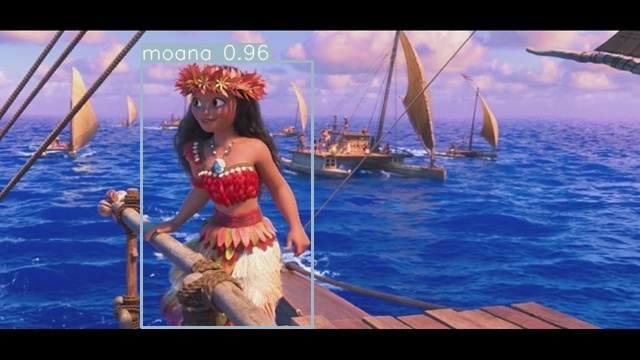

In [37]:
Image(filename='out_out/moana_033Medium.jpeg', width=500)

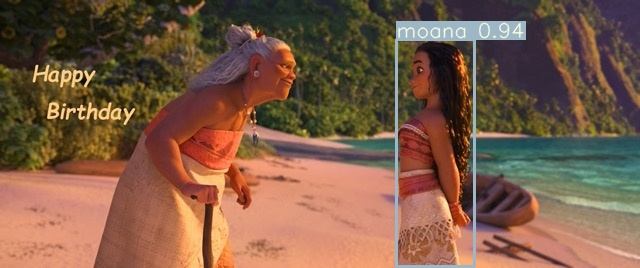

In [39]:
Image(filename='out_out/moanabirthday10Medium.jpeg', width=500)

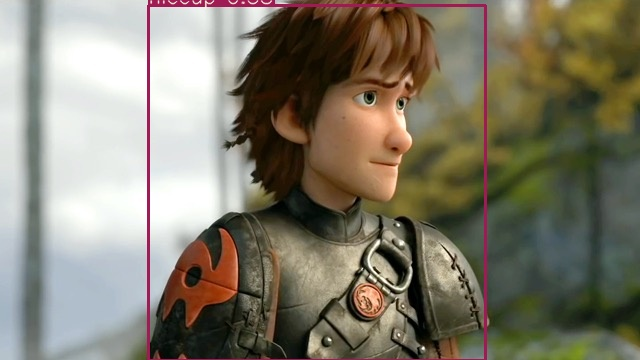

In [40]:
Image(filename='out_out/HowtoTrainYourDragon2_Trailer1Medium.jpeg', width=500)

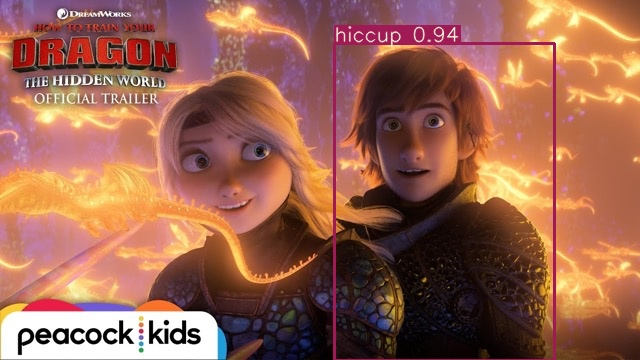

In [42]:
Image(filename='out_out/maxresdefaultMedium.jpeg', width=500)

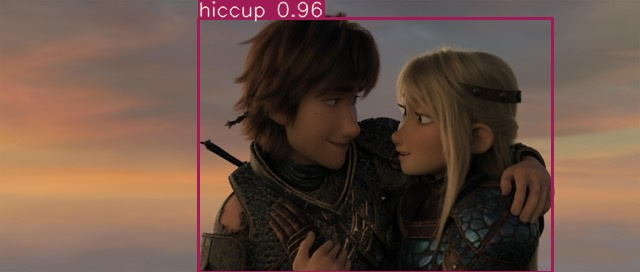

In [44]:
Image(filename='out_out/999572Medium.jpeg', width=500)

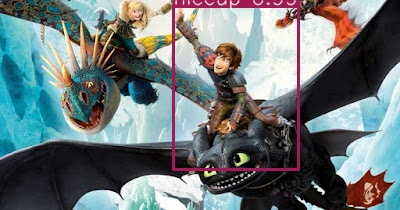

In [45]:
Image(filename='out_out/howto7.jpeg', width=500)

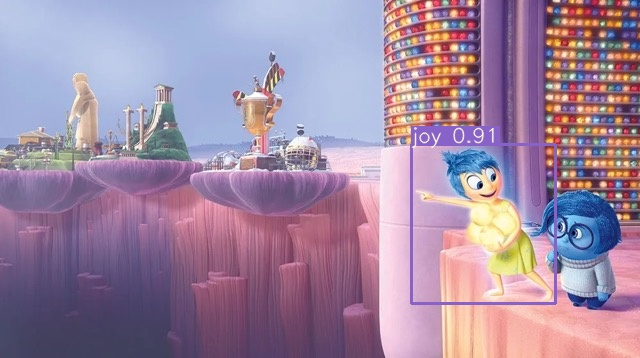

In [46]:
Image(filename='out_out/inside-out-10Medium.jpeg', width=500)

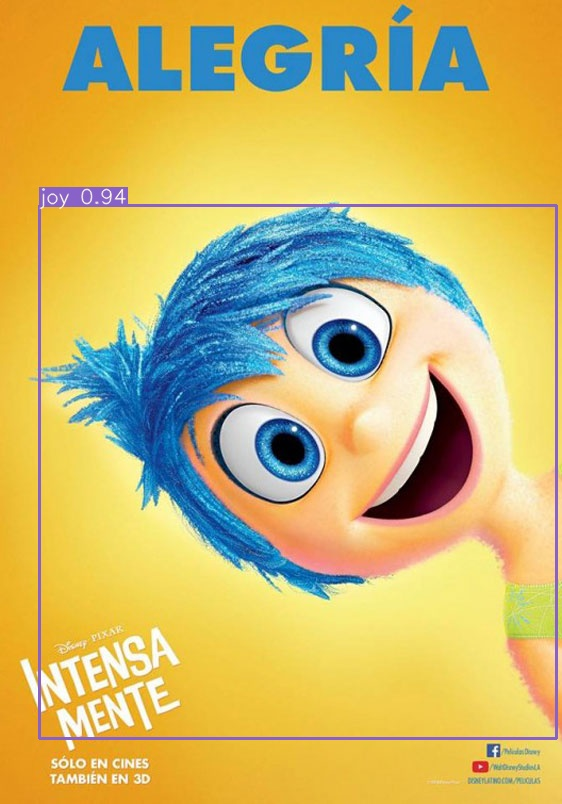

In [47]:
Image(filename='out_out/inside-out-poster-12.jpeg', width=500)

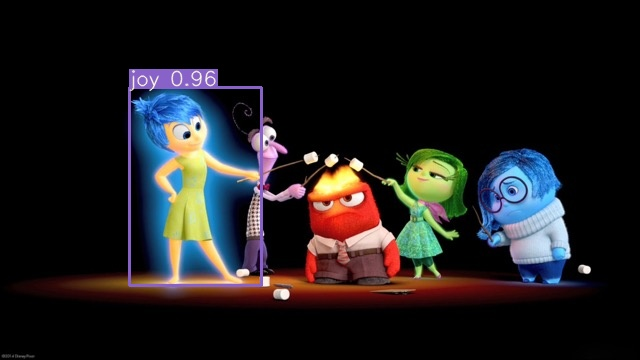

In [48]:
Image(filename='out_out/637817Medium.jpeg', width=500)

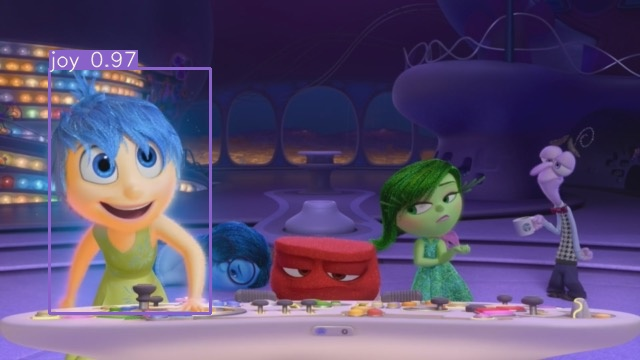

In [49]:
Image(filename='out_out/665076Medium.jpeg', width=500)

In [33]:
# Copy the weights and output folders
!cp -r /content/YoloV3/weights /content/gdrive/MyDrive/EVA8/Session12/weights_custom 

In [41]:
!cp -r /content/YoloV3/out_out /content/gdrive/MyDrive/EVA8/Session12/out_out